In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up request headers for SEC API
headers = {'User-Agent': "lvck.zer0@gmail.com"}  # Replace with your email for SEC compliance

In [2]:
def fetch_company_data(headers):
    """Fetch the company tickers data from the SEC website."""
    response = requests.get("https://www.sec.gov/files/company_tickers.json", headers=headers)
    response.raise_for_status()  # Raise an error for bad status codes
    return response.json()

def convert_to_dataframe(company_tickers):
    """Convert the company tickers JSON data to a DataFrame."""
    df = pd.DataFrame.from_dict(company_tickers, orient='index')
    df['cik_str'] = df['cik_str'].astype(str).str.zfill(10)  # Ensure CIKs have leading zeros
    return df

def get_cik_by_ticker(company_data, ticker):
    """Get the CIK for a given ticker."""
    result = company_data[company_data['ticker'].str.upper() == ticker.upper()]
    if not result.empty:
        return result.iloc[0]['cik_str']
    else:
        return None

# Fetch and process company data
company_tickers = fetch_company_data(headers)
company_data = convert_to_dataframe(company_tickers)

# Example: Get CIK for MSFT
ticker = "MSFT"
cik = get_cik_by_ticker(company_data, ticker)

if cik:
    print(f"CIK for {ticker}: {cik}")
else:
    print(f"Company with ticker {ticker} not found.")

CIK for MSFT: 0000789019


Recent Filings Metadata:
        accessionNumber  reportDate     form
0  0001214659-24-018029              PX14A6G
1  0001193125-24-242888  2024-06-30      ARS
2  0001193125-24-242884              DEFA14A
3  0001193125-24-242883  2024-12-10  DEF 14A
4  0001062993-24-016766  2024-09-16        4


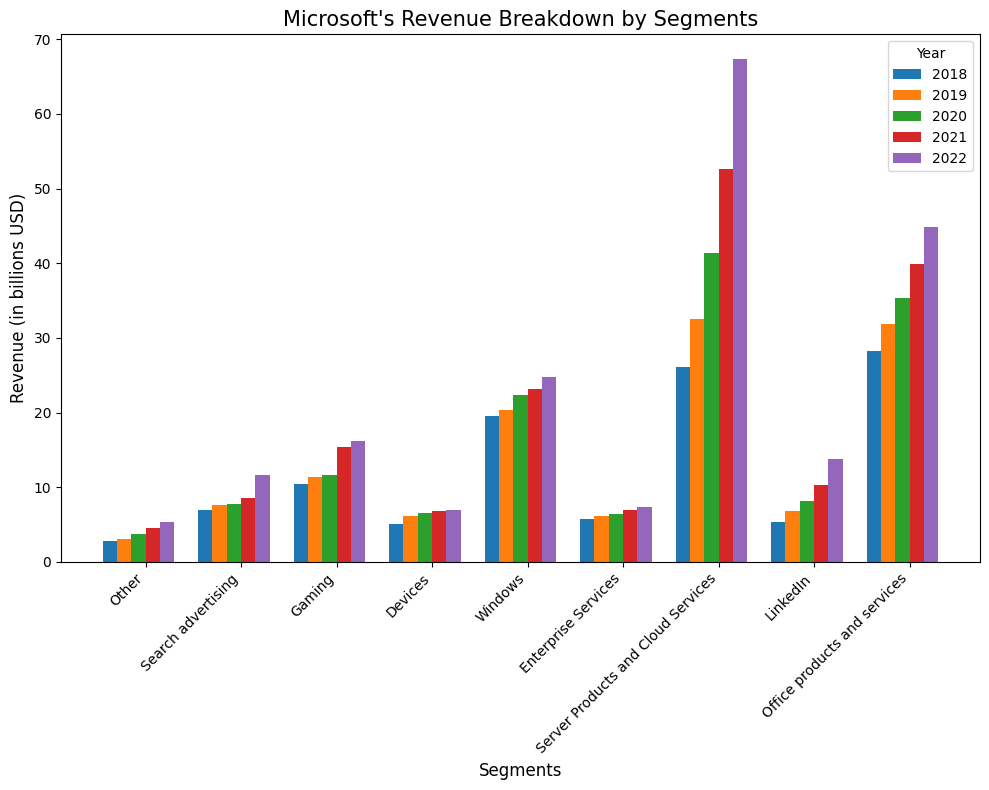

In [ ]:

# Step 2: Get Filing Metadata for the Selected Company
# Fetch metadata for recent filings for the specific company by CIK
filing_metadata_response = requests.get(
    f'https://data.sec.gov/submissions/CIK{cik}.json',
    headers=headers
)
filing_metadata_response.raise_for_status()
filing_metadata = filing_metadata_response.json()

# Convert filing metadata (recent filings) to a DataFrame
recent_filings = pd.DataFrame.from_dict(filing_metadata['filings']['recent'])

# Display key metadata for recent filings
print("Recent Filings Metadata:")
print(recent_filings[['accessionNumber', 'reportDate', 'form']].head())

# Step 3: Extract Revenue Breakdown Data and Create Visualization
# Here we mock the revenue breakdown data since we need a well-structured breakdown for each segment
# In a real scenario, this would involve parsing detailed sections from the filings.

# Mock Data to Simulate Revenue Breakdown (in billions USD)
data = {
    'Segment': ['Other', 'Search advertising', 'Gaming', 'Devices', 'Windows', 'Enterprise Services',
                'Server Products and Cloud Services', 'LinkedIn', 'Office products and services'],
    '2018': [2.8, 7.0, 10.4, 5.1, 19.5, 5.8, 26.1, 5.3, 28.3],
    '2019': [3.1, 7.6, 11.4, 6.1, 20.4, 6.1, 32.6, 6.8, 31.8],
    '2020': [3.8, 7.7, 11.6, 6.5, 22.3, 6.4, 41.4, 8.1, 35.3],
    '2021': [4.5, 8.5, 15.4, 6.8, 23.2, 6.9, 52.6, 10.3, 39.9],
    '2022': [5.3, 11.6, 16.2, 7.0, 24.8, 7.4, 67.3, 13.8, 44.9]
}

# Convert to DataFrame
revenue_df = pd.DataFrame(data)

# Plotting the Revenue Breakdown by Segments
years = ['2018', '2019', '2020', '2021', '2022']
fig, ax = plt.subplots(figsize=(10, 8))

# Set bar width
bar_width = 0.15

# Create index for each year to plot side-by-side bars
index = np.arange(len(revenue_df))

# Plot each year with a different color and bar position
for i, year in enumerate(years):
    ax.bar(index + i * bar_width, revenue_df[year], bar_width, label=year)

# Set labels, title, and legend
ax.set_xlabel('Segments', fontsize=12)
ax.set_ylabel('Revenue (in billions USD)', fontsize=12)
ax.set_title("Microsoft's Revenue Breakdown by Segments", fontsize=15)
ax.set_xticks(index + bar_width * (len(years) / 2))
ax.set_xticklabels(revenue_df['Segment'], rotation=45, ha="right")
ax.legend(title="Year")

plt.tight_layout()
plt.show()
